In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import sys

from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import time


plt.rcParams["figure.figsize"] = (12, 9)
warnings.simplefilter("ignore")

sys.path.append("../1_Format_donnees/")
from aggregation import load_and_preprocess_agg_metrics, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix, get_scores, plot_feature_importance

### <8 mbits en cumsum = bruit 

# Load Data

In [2]:
time_counter = time.time_ns()

df_test = load_and_preprocess_agg_metrics("../Mesures/test")
df_train = load_and_preprocess_agg_metrics("../Mesures/train")


process_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Dataset generation took : {process_duration} s")

Load datasets...
Extracting ../Mesures/test\messenger20221129_151124.csv.... 1/5


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.30it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 2/5


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.18it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 3/5


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 12.32it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 4/5


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 500.99it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 5/5


100%|███████████████████████████████████████████████████████████████████████████████| 260/260 [00:00<00:00, 343.99it/s]


Computing metrics and statistics...


100%|████████████████████████████████████████████████████████████████████████████████| 498/498 [00:11<00:00, 45.08it/s]


Load datasets...
Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/33


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 92.34it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/33


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 31.02it/s]


Extracting ../Mesures/train\messenger20221124_151137.csv.... 3/33


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 14.98it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 4/33


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 71.21it/s]


Extracting ../Mesures/train\messenger20221125_150706.csv.... 5/33


100%|████████████████████████████████████████████████████████████████████████████████| 335/335 [00:04<00:00, 79.90it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 6/33


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  9.80it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 7/33


100%|███████████████████████████████████████████████████████████████████████████████| 839/839 [00:01<00:00, 459.54it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 8/33


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.99it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 9/33


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 26.35it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 10/33


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 11/33


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.86it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 12/33


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 32.65it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 13/33


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.18it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 14/33


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.63it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 15/33


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  7.71it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 16/33


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 85.66it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 17/33


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 43.26it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 18/33


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [00:01<00:00, 58.92it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 19/33


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 77.82it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 20/33


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 149.35it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 21/33


100%|███████████████████████████████████████████████████████████████████████████████| 427/427 [00:01<00:00, 286.91it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 22/33


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 364.50it/s]

Extracting ../Mesures/train\youtube20221108_182416.csv.... 23/33



100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 253.16it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 24/33


100%|███████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 611.94it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 25/33


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 589.21it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 26/33


100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 529.71it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 27/33


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 463.84it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 28/33


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 554.11it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 29/33


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 330.31it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 30/33


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 245.90it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 31/33


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 318.10it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 32/33


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 360.62it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 33/33


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 213.77it/s]


Computing metrics and statistics...


100%|██████████████████████████████████████████████████████████████████████████████| 2958/2958 [00:58<00:00, 50.43it/s]


Dataset generation took : 267.2942044 s


# Scale

In [3]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

,reg_lin_R2_TBS_up,reg_lin_coef_A_TBS_up,p0_TBS_up,p10_TBS_up,p25_TBS_up,p50_TBS_up,p75_TBS_up,p90_TBS_up,p100_TBS_up,mean_TBS_up,...,p25_TBS_down,p50_TBS_down,p75_TBS_down,p90_TBS_down,p100_TBS_down,mean_TBS_down,std_TBS_down,sum_TBS_down,mean_per_time_TBS_down,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4,1.077186,2.694860,-0.081577,0.062428,-0.008143,0.006715,1.315660,1.549406,2.195096,1.281451,...,-0.267103,-0.391628,-0.233581,-0.345754,0.730070,-0.352516,-0.432977,1.458055,0.125823,messenger
20221117_125310_8,1.057840,2.656602,-0.043356,0.062428,-0.008143,0.006715,1.468836,1.887631,1.445194,1.293917,...,-0.267103,-0.294564,-0.269686,-0.379575,-0.037002,-0.338950,-0.360367,-0.134412,0.173649,messenger
20221117_125310_7,1.069214,2.708880,-0.100687,0.014769,-0.008143,0.617064,1.583717,0.935317,1.277969,0.975863,...,-0.267103,-0.391628,-0.298570,-0.334480,-0.319292,-0.414956,-0.435672,-0.136610,-0.059457,messenger
20221117_125310_9,1.043604,2.788673,-0.024246,0.014769,-0.008143,0.769652,1.851775,1.549406,1.277969,1.398507,...,-0.267103,-0.294564,-0.269686,-0.300660,-0.485359,-0.343700,-0.438147,-0.137536,0.078958,messenger
20221117_125310_10,1.062619,2.303412,-0.081577,0.100556,0.067066,0.769652,1.622011,1.549406,1.277969,1.357842,...,-0.267103,-0.323476,-0.060274,-0.285629,-0.451570,-0.312272,-0.390384,-0.137277,0.217149,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230117_095221_139,1.034443,-0.204875,-0.081577,-0.023358,-0.092753,-0.176390,-0.311832,-0.062445,1.194356,-0.072056,...,0.612936,-0.067392,-0.388834,-0.432184,0.270929,-0.373078,-0.483401,-0.034620,0.219263,youtube
20230117_095221_140,0.885539,-0.204630,-0.043356,0.014769,-0.069250,-0.176390,-0.350126,1.464850,0.716196,0.103111,...,-0.278314,1.283245,0.201490,-0.243353,-0.547424,-0.051994,-0.363461,-0.124688,0.362876,youtube
20230117_095221_141,0.937766,-0.267343,-0.024246,-0.118677,-0.092753,-0.176390,-0.426714,-0.550756,1.194356,-0.136790,...,0.612936,-0.067392,-0.388834,0.169869,0.190412,0.080498,0.401415,-0.117173,0.565448,youtube


In [4]:
training_data.isna().sum()

reg_lin_R2_TBS_up          0
reg_lin_coef_A_TBS_up      0
p0_TBS_up                  0
p10_TBS_up                 0
p25_TBS_up                 0
p50_TBS_up                 0
p75_TBS_up                 0
p90_TBS_up                 0
p100_TBS_up                0
mean_TBS_up                0
std_TBS_up                 0
sum_TBS_up                 0
mean_per_time_TBS_up       0
reg_lin_R2_TBS_down        0
reg_lin_coef_A_TBS_down    0
p0_TBS_down                0
p10_TBS_down               0
p25_TBS_down               0
p50_TBS_down               0
p75_TBS_down               0
p90_TBS_down               0
p100_TBS_down              0
mean_TBS_down              0
std_TBS_down               0
sum_TBS_down               0
mean_per_time_TBS_down     0
label                      0
dtype: int64

# Remove Noise

In [5]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

# Train

In [6]:
time_counter = time.time_ns()

model = RandomForestClassifier(class_weight = "balanced")
model.fit(training_data[training_data.columns[:-1]], training_data.label)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(training_data.label)}")

Training Duration : 0.4260101 s for a dataset length of 999


# Test

In [7]:
# mesure efficiency
time_counter = time.time_ns()

preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(testing_data.label)}")
testing_duration_per_item = testing_duration*(10**3)/len(testing_data.label)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

Testing Duration : 0.0247988 s for a dataset length of 421
Testing Duration per data : 0.05890451306413302 ms


normalized confusion matrix


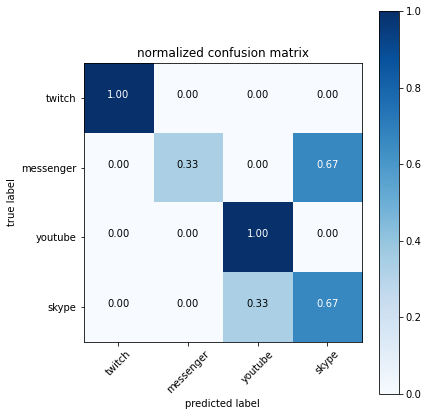

In [8]:
plot_confusion_matrix(true_labels,preds_labels)

In [9]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.75,
 'Precision': 0.9940675370309366,
 'Recall': 0.9928741092636579,
 'F1_Score': 0.9921968995906985,
 'support': None}

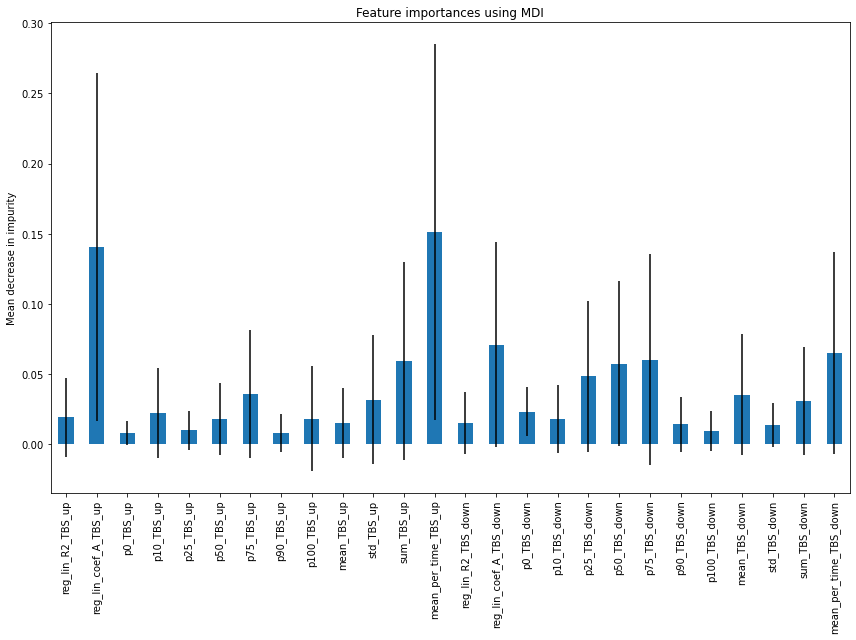

In [10]:
plot_feature_importance(model, training_data.columns[:-1])